# Pymaceuticals Inc.
---

### Analysis

- In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against Ramicane, Ketapril, Naftisol, Zoniferol, Placebo, Stelasyn, Ceftamin, Infubinol, and Propriva.
- 
Mice treated with Capomulin and Ramicane had the highest numbers of mice points, exposure, compared to the rest of the drug regimen. Propriva had the least observed mouse points in the course of the study
 - 
Final tumor volumes were the least in Ramicane followed by Capomulin at at least 41.0 mm3 but highest in Ketapril at 55.88 mm3. Ketapril has also the highest variance in tumor volume as well as the highest standard deviation and SEM. Similar high distributions were seen in mice that were on Naftiso
   .-  
Infubinol had potential outliers, and this may have skewed the overall mean volumes of mice exposed to this drug, suggesting that it might have had better efficacy than what what observed in the stu
  y- . 
Many mice that were on ceftamin were seen to have large final tumor volumes, and this may require further investigat
o- n. 
In general, the size of the tumor appeared to reduce significantly between day 20 and 35 among mice on Capomulin. There was minimal remission between days 36 and 45. A strong positive correlation was thus observed between the study drug and the average tumour volume (84%), with lower doses proving better on SCC in the mice exposed to it.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# study_results

In [4]:
# Combine the data into a single DataFrame
data1 = pd.merge(study_results, mouse_metadata, on='Mouse ID', how = 'outer')

# Sort the data by 'Timepoint' to ensure it's in chronological order

data1.sort_values(by='Timepoint', inplace=True)

# Group by 'Mouse ID' and get the index of the first occurrence of each Mouse ID

data_first_id_on_index = data1.groupby('Mouse ID').head(1).index

# Reorder the DataFrame based on the index of the first occurrence of each Mouse ID

data = pd.concat([data1.loc[data_first_id_on_index], data1.drop(data_first_id_on_index)])

# Display the data table for preview
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1460,w584,0,45.0,0,Infubinol,Male,3,29
1006,p136,0,45.0,0,Zoniferol,Female,5,28
461,a411,0,45.0,0,Ramicane,Male,3,22
1467,b447,0,45.0,0,Ceftamin,Male,2,30


In [5]:
# Checking the number of mice
data['Mouse ID'].nunique()

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint 

# data['Mouse ID'].value_counts()

duplicate_rows = data[data.duplicated(subset=['Mouse ID', 'Timepoint'],keep=False)]
duplicate_rows['Mouse ID'].unique()

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID 

duplicate_rows2 = data[data['Mouse ID']=='g989']
duplicate_rows2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
data1 = data[data['Mouse ID'] != 'g989']
data1.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1460,w584,0,45.0,0,Infubinol,Male,3,29
1006,p136,0,45.0,0,Zoniferol,Female,5,28
461,a411,0,45.0,0,Ramicane,Male,3,22
1467,b447,0,45.0,0,Ceftamin,Male,2,30


In [9]:
# Checking the number of mice in the clean DataFrame
data1['Mouse ID'].nunique()

248

## Summary Statistics

In [10]:
# Import dependencies
import numpy as np
import scipy.stats as st

In [11]:
# # list the columns
# for i in data1:
#     print(i)

In [12]:
# import the sem dependecy
from scipy.stats import sem

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

summary_stats = data1.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std'])
summary_stats['SEM'] = data1.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(sem)

# Assemble the resulting series into a single summary DataFrame.
summary_stats.rename(columns={'mean' : 'Mean Tumor Volume',  'median' : 'Median Tumor Volume',  
                              'var':'Tumor Volume Variance',  'std': 'Tumor Volume Std. Dev.', 
                              'SEM' : 'Tumor Volume Std. Err'},inplace=True)
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats1 = data1.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
    ('mean', 'mean'), 
    ('median', 'median'), 
    ('var', 'var'), 
    ('std', 'std'), 
    ('sem', lambda x: sem(x, nan_policy='omit'))
]).rename(columns={'<lambda>': 'sem'})

summary_stats1


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

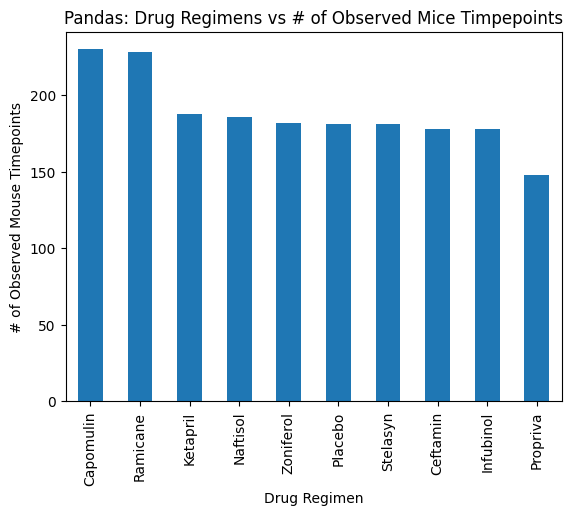

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas

data1.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False).plot(kind='bar', title='Pandas: Drug Regimens vs # of Observed Mice Timpepoints')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show;

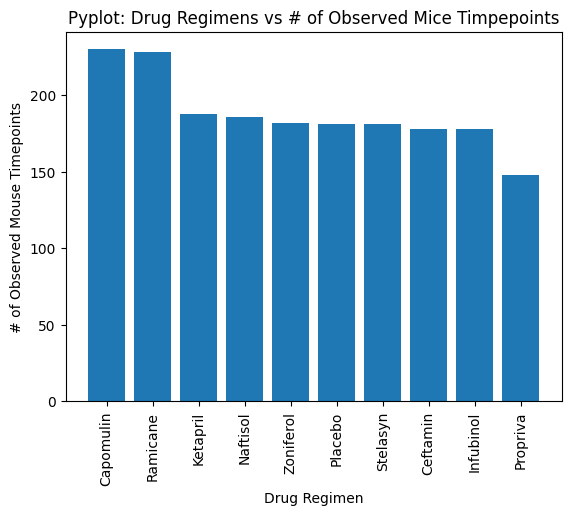

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot
count_data = data1.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)
# plt.figure(figsize=(8,6))
plt.bar(count_data.index, count_data.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation = 90)
plt.title('Pyplot: Drug Regimens vs # of Observed Mice Timpepoints')
plt.show();


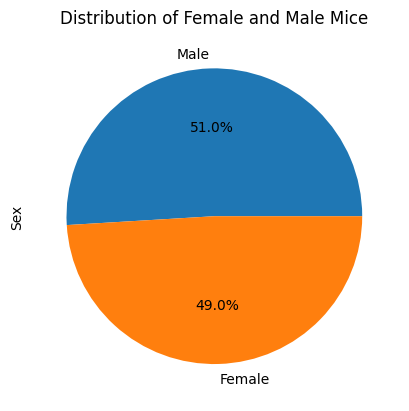

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = data1['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Female and Male Mice')
plt.ylabel('Sex')

plt.show;

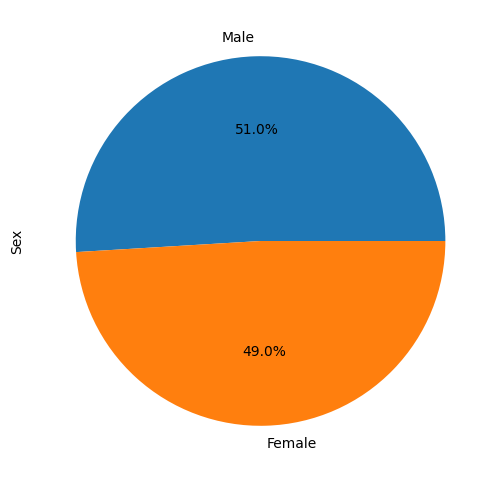

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count1 = data1['Sex'].value_counts()

plt.figure(figsize = (8,6))
plt.pie(sex_count1, labels=sex_count1.index, autopct='%1.1f%%')
plt.ylabel('Sex')

plt.show;

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Step 1: Get the last (greatest) timepoint for each mouse
greatest_timepoint = data1.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max()
greatest_timepoint = greatest_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Step 2: Merge with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_size_merged = pd.merge(greatest_timepoint, data1, on=['Mouse ID', 'Drug Regimen', 'Timepoint'], how='left')

# Filter for the specified treatment regimens
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_size_merged = final_tumor_size_merged[final_tumor_size_merged['Drug Regimen'].isin(selected_regimens)]

# Display the final DataFrame
final_tumor_size_merged




,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,a203,Infubinol,45,67.973419,2,Female,20,23
1,a251,Infubinol,45,65.525743,1,Female,21,25
3,a275,Ceftamin,45,62.999356,3,Female,20,28
6,a411,Ramicane,45,38.407618,1,Male,3,22
7,a444,Ramicane,45,43.047543,0,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,Ceftamin,45,68.594745,4,Female,6,27
239,y793,Capomulin,45,31.896238,2,Male,17,17
240,y865,Ceftamin,45,64.729837,3,Male,23,26
244,z578,Ramicane,45,30.638696,0,Male,11,16


In [19]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty dictionary to store potential outliers for each regimen
outliers = {}

# Define the order of regimens
regimen_order = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Iterate over each drug regimen in the specified order
for regimen in regimen_order:
    # Filter the DataFrame for the current regimen
    regimen_data = final_tumor_size_merged[final_tumor_size_merged['Drug Regimen'] == regimen]
    
    # Extract tumor volume data for the current regimen
    tumor_volume = regimen_data['Tumor Volume (mm3)']
    
    # Calculate quartiles (Q1, Q3) and IQR for tumor volume data
    quartiles = tumor_volume.quantile([0.25, 0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    IQR = Q3 - Q1
    
    # Determine lower and upper bounds for potential outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify potential outliers for the current regimen
    potential_outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    
    # Store potential outliers in the dictionary
    outliers[regimen] = potential_outliers

# Print potential outliers for each regimen
for regimen, potential_outliers in outliers.items():
    if regimen == 'Capomulin':
        print(f"Capomulin's potential outliers: {potential_outliers}")
    elif regimen == 'Ramicane':
        print(f"Ramicane's potential outliers: {potential_outliers}")
    elif regimen == 'Infubinol':
        print(f"Infubinol's potential outliers: {potential_outliers}")
    elif regimen == 'Ceftamin':
        print(f"Ceftamin's potential outliers: {potential_outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


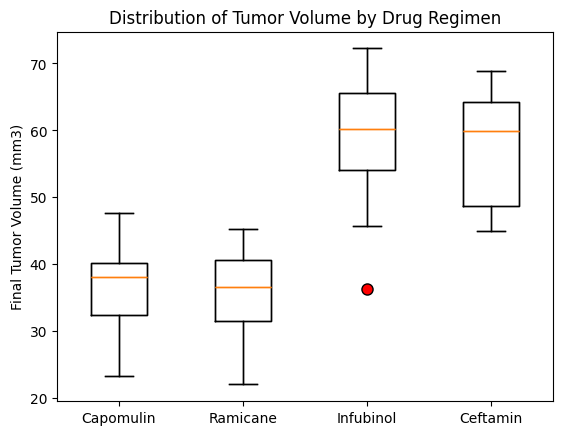

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

# Define the order of the drugs
desired_order = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Group the data by 'Drug Regimen' and extract the tumor volume data
grouped_data = final_tumor_size_merged.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Create an empty list to store tumor volume data for each treatment group in the desired order
tumor_list = []

# Iterate over the desired order of drugs and append tumor volume data to the list
for drug in desired_order:
    tumor_list.append(grouped_data.get_group(drug).tolist())

# Create a box plot using Matplotlib
fig1, ax1 = plt.subplots()
ax1.set_title('Distribution of Tumor Volume by Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_list)
ax1.boxplot(tumor_list, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))

# Set x-axis ticks and labels
plt.xticks(range(1, len(desired_order) + 1), desired_order)

# Show the plot
plt.show()



## Line and Scatter Plots

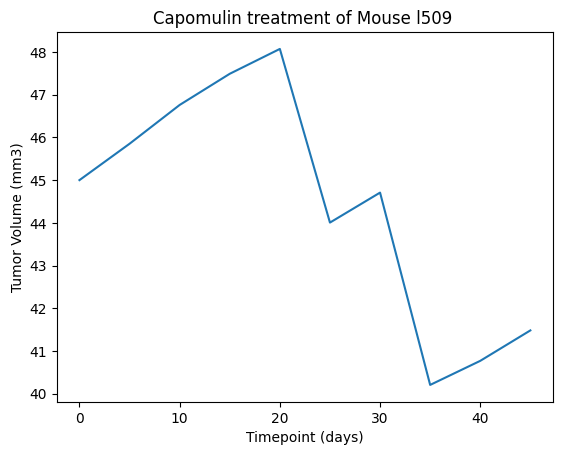

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the DataFrame for mice treated with Capomulin
capomulin_data = data1[data1['Drug Regimen'] == 'Capomulin']

# Choose a specific mouse ID
mouse_ID = 'l509'

# Filter the DataFrame for the chosen mouse ID
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_ID]

# Plot tumor volume vs. time point
# plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

# Set the title and labels
plt.title(f"Capomulin treatment of Mouse {mouse_ID} ")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Display the plot
# plt.grid(True)
plt.show()


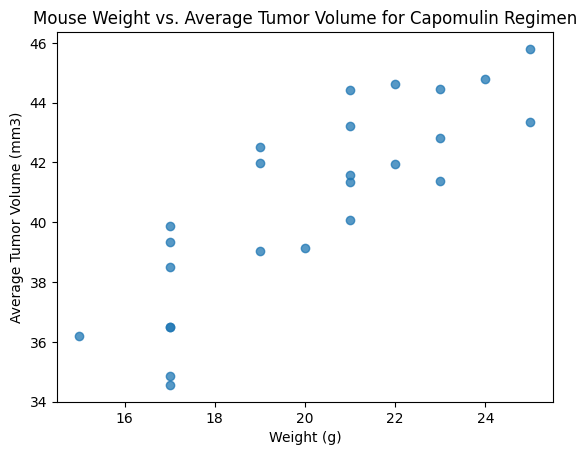

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


# Filter the DataFrame for the Capomulin regimen
capomulin_data = data1[data1['Drug Regimen'] == 'Capomulin']

# Group by mouse ID and calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with the mouse weight data
merged_data = pd.merge(average_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='left').drop_duplicates()

# Extract weight and average tumor volume as x and y values for the scatter plot
x_values = merged_data['Weight (g)']
y_values = merged_data['Tumor Volume (mm3)']

# Plot mouse weight vs. average tumor volume
plt.scatter(x_values, y_values, marker='o',  alpha=0.75)

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# # Show grid
# plt.grid(True)

# Show plot
plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


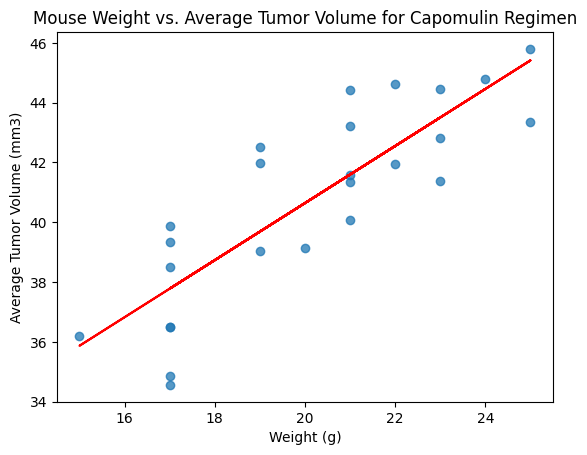

In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# fetch the dependencies
from scipy.stats import linregress

# Filter the DataFrame for the Capomulin regimen
capomulin_data = data1[data1['Drug Regimen'] == 'Capomulin']

# Group by mouse ID and calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with the mouse weight data
merged_data = pd.merge(average_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='left').drop_duplicates()

# Extract weight and average tumor volume
x_values = merged_data['Weight (g)']
y_values = merged_data['Tumor Volume (mm3)']

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(x_values, y_values)[0, 1]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regression_line = slope * x_values + intercept

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values, marker='o', alpha=0.75)
# plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)
plt.plot(x_values, regression_line, color='red')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')


# Add correlation coefficient to the plot
print(f'The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}')
# Show plot
plt.show()
